In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path='./Data/'
df=pd.read_csv(data_path+'titanic_train.csv')

train_Y=df['Survived']
df=df.drop(['PassengerId'],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.columns.values 

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [15]:
sns.__version__

'0.9.0'

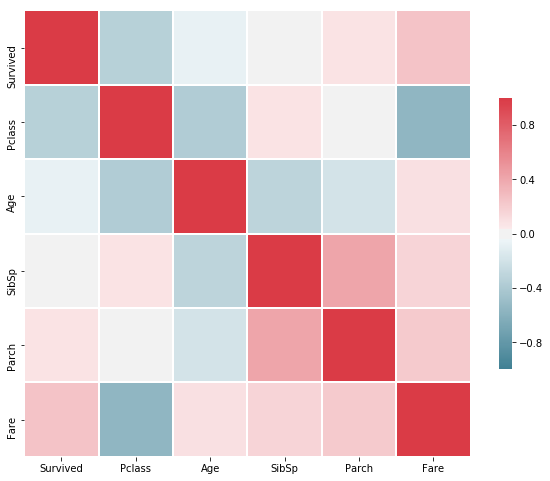

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 10)) 

sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, center=0, 
           square=True, linewidths=1, cbar_kws={"shrink": .5})
plt.show()

In [16]:
df=df.drop(['Survived'],axis=1)

num_features=[]
for dtype,feature in zip(df.dtypes, df.columns):
    if dtype=='float64' or dtype=='int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features:{num_features}\n')

df=df[num_features]
df=df.fillna(-1)
MMEncoder=MinMaxScaler()
df.head()

5 Numeric Features:['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [18]:
train_X=MMEncoder.fit_transform(df)
estimator=LogisticRegression()
print(f' Original with Logistic Reg:{cross_val_score(estimator,train_X,train_Y,cv=5).mean()}\n')

 Original with Logistic Reg:0.7038635542329971



C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn

In [19]:
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
#D30-1-1
high_list=list(corr[(corr['Survived']>0.1)|(corr['Survived']<-0.1)].index)
high_list.pop(0)
print(high_list)

['Pclass', 'Fare']


In [24]:
train_X=MMEncoder.fit_transform(df[high_list])
print(f' High List with Logistic Reg:{cross_val_score(estimator,train_X,train_Y,cv=5).mean()}\n')

 High List with Logistic Reg:0.6791567235397566



C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn

In [26]:
#D30-1-2
high_list=list(corr[(corr['Survived']>0.05)|(corr['Survived']<-0.05)].index)
high_list.pop(0)
print(high_list)

['Pclass', 'Age', 'Parch', 'Fare']


In [27]:
train_X=MMEncoder.fit_transform(df[high_list])
print(f' High List with Logistic Reg:{cross_val_score(estimator,train_X,train_Y,cv=5).mean()}\n')

 High List with Logistic Reg:0.7049872206659582



C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn

In [28]:
#D30-2
from sklearn.linear_model import Lasso

L1_Reg=Lasso(alpha=0.001)

train_X=MMEncoder.fit_transform(df)
L1_Reg.fit(train_X,train_Y)
L1_Reg.coef_

C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([-0.39684291, -0.25338753, -0.19144856,  0.28161304,  0.28188094])

In [29]:
from itertools import compress
L1_mask=list((L1_Reg.coef_>0)|(L1_Reg.coef_<0))
L1_list=list(compress(list(df),list(L1_mask)))
L1_list

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [30]:
train_X=MMEncoder.fit_transform(df[high_list])
print(f' L1 with Logistic Reg:{cross_val_score(estimator,train_X,train_Y,cv=5).mean()}\n')

 L1 with Logistic Reg:0.7049872206659582



C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jwen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn